In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
np.random.seed(0)
data = np.random.normal(0, 1, size=1000)

In [12]:
minimum = 0
min_idx = 0
for i in range(0, 100):
    if data[i] < minimum:
        minimum = data[i]
        min_idx = i
print(f"{minimum} at index {min_idx}")

-2.5529898158340787 at index 20


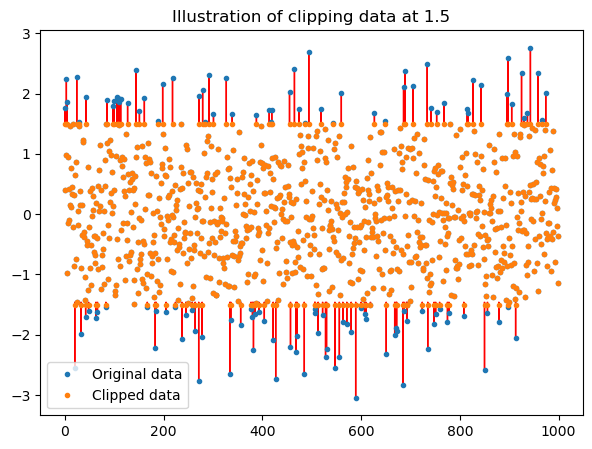

In [22]:
plt.figure(figsize=(7, 5))
# Define the clip value
clip_value = 1.5

# Apply the clip value
data_clip = np.clip(data, -clip_value, clip_value)

plt.plot(data, '.', label='Original data')
plt.plot(data_clip, '.', label='Clipped data')

# draw arrows to show clipping
for i in range(0, 1000):
    if data[i] < -clip_value:
        plt.arrow(i, data[i], 0, -clip_value - data[i], color='red', width=0.01)
    elif data[i] > clip_value:
        plt.arrow(i, data[i], 0, clip_value - data[i], color='red', width=0.01)

plt.title(f"Illustration of clipping data at {clip_value}")
plt.legend()
plt.show()

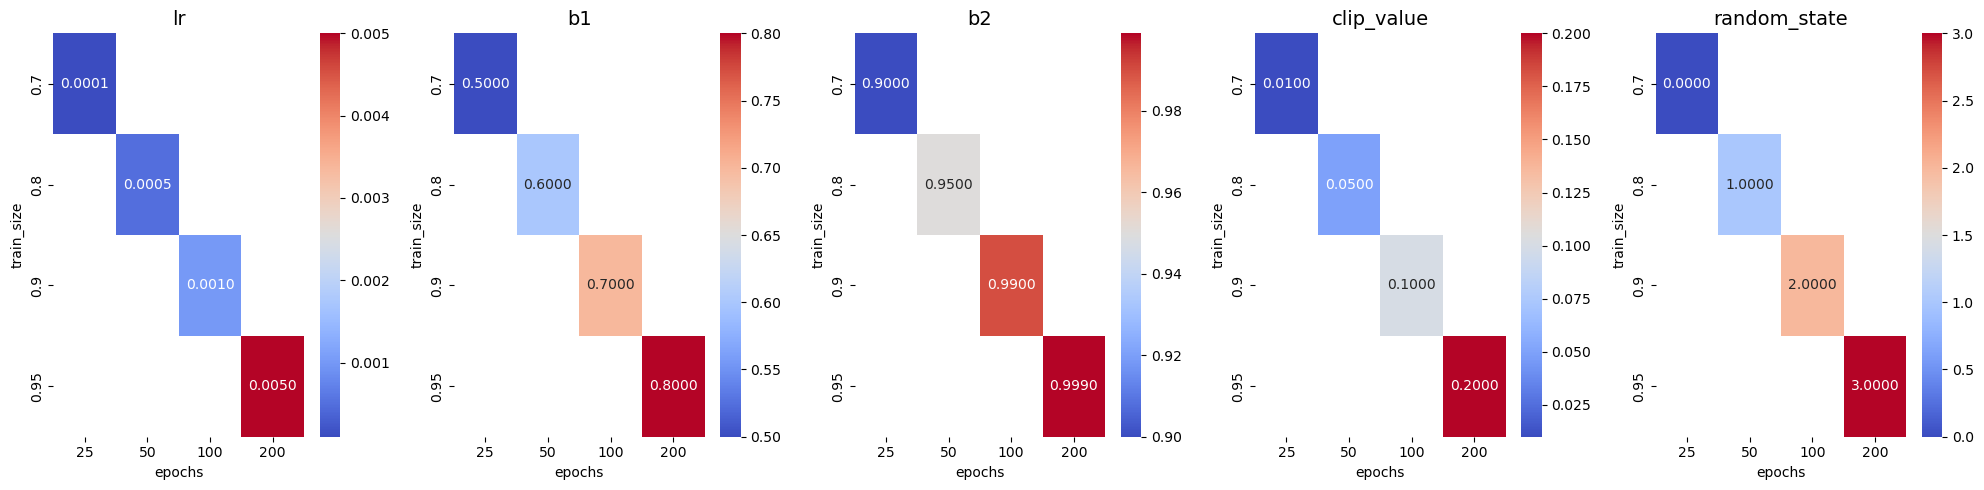

In [7]:


d = {
        'train_size': [0.7, 0.8, 0.9, 0.95, np.nan, np.nan, np.nan, np.nan],
        'epochs': [25, 50, 100, 200, 250, 300, 400, 500],
        'batch_size': [32, 64, 128, 256, 512, 1024, np.nan, np.nan],
        'lr': [0.0001, 0.0005, 0.001, 0.005, 0.01, np.nan, np.nan, np.nan],
        'b1': [0.5, 0.6, 0.7, 0.8, 0.9, np.nan, np.nan, np.nan],
        'b2': [0.9, 0.95, 0.99, 0.999, 0.9999, 0.99999, np.nan, np.nan],
        'clip_value': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, None],
        'random_state': [0, 1, 2, 3, 4, 5, 6, 7]
    }

df = pd.DataFrame.from_dict(d)

# define the hyperparameters to visualize
params = ['lr', 'b1', 'b2', 'clip_value', 'random_state']

# create a subplot for each hyperparameter
fig, axes = plt.subplots(ncols=len(params), figsize=(20, 5))

# loop over the subplots and create a heatmap for each hyperparameter
for i, param in enumerate(params):
    sns.heatmap(df.pivot_table(index='train_size', columns='epochs', values=param, aggfunc=lambda x: x), 
                cmap='coolwarm', annot=True, fmt='.4f', ax=axes[i])
    axes[i].set_title(param, fontsize=14)

plt.tight_layout()
plt.show()